In [3]:
import numpy as np
import pandas as pd

def get_weights(circle, type, holder):
    data = pd.read_csv(f'circle{circle}.txt', header=None)
    
    type_col = data[3]
    weight_col = 4
    holder_col = data[5].astype(int)
    
    filtered_data = data[(type_col == type) & (holder_col == holder)]
    
    return np.array(filtered_data[weight_col])

In [91]:
get_weights(circle=4, type="B", holder=0)

array([24.84, 28.74, 24.84, 46.57, 30.24])

In [99]:
for holder in range(368):
    print(get_weights_filtered(circle=6, type="A", holder=holder).mean())

48.23499999999999
22.063750000000002
20.604999999999997
12.868749999999999
17.810000000000002
22.4275
25.275
25.68125
22.758333333333336
18.466250000000002
17.4025
15.69125
22.29
27.16375
27.036250000000003
24.603749999999998
21.731249999999996
14.367500000000003
20.7225
19.82375
19.7575
26.674999999999997
24.298333333333332
22.650000000000002
19.7
8.776250000000001
5.37875
9.80875
7.2162500000000005
25.25375
23.05875
19.155
24.5475
11.63875
5.662500000000001
65.50125
27.353
13.5
19.198999999999998
14.80125
20.34375
15.952499999999999
12.33125
33.121249999999996
24.490000000000002
18.4225
4.29375
23.183749999999996
23.843749999999996
16.40625
3.40625
21.72
21.872500000000002
15.001666666666667
-0.22624999999999998
7.95
25.963749999999997
23.8775
26.29625
20.253750000000004
22.4425
18.08125
21.78125
25.833750000000002
25.3675
23.927
22.655
18.902000000000005
20.90875
20.53875
22.142500000000002
23.48625
22.03875
-12.517500000000002
28.161249999999995
19.1975
20.61375
17.065
4.7650000000

In [9]:
def get_weights_filtered(circle, type, holder, window_size=2):
    data = pd.read_csv(f'circle{circle}.txt', header=None)
    
    type_col = data[3]
    weight_col = 4
    holder_col = data[5].astype(int)
    
    filtered_data = data[(type_col == type) & (holder_col == holder)]
    
    weights = np.array(filtered_data[weight_col])
    
    # Фильтрация шума с использованием скользящего среднего
    filtered_weights = np.convolve(weights, np.ones(window_size), 'valid') / window_size
    
    return filtered_weights

get_weights_filtered(circle=2, type="A", holder=0)

array([40.595, 40.595, 24.485, 25.7  ])

In [10]:
get_weights(circle=2, type="A", holder=0)

array([19.89, 61.3 , 19.89, 29.08, 22.32])

In [84]:
def plot_weights(circles, type, save=False):
    # Списки для хранения значений для каждого графика
    min_values = {circle: [] for circle in circles}
    max_values = {circle: [] for circle in circles}
    mean_values = {circle: [] for circle in circles}
    std_values = {circle: [] for circle in circles}

    for holder in range(368):
        for circle in circles:
            weights = get_weights(circle, type, holder)
            
            # Статистика
            min_values[circle].append(np.min(weights))
            max_values[circle].append(np.max(weights))
            mean_values[circle].append(np.mean(weights))
            std_values[circle].append(np.std(weights))

    for values, title in zip([min_values, max_values, mean_values, std_values], ['Min Weights', 'Max Weights', 'Mean Weights', 'Std Weights']):
        plt.figure()
        for circle in circles:
            plt.plot(range(368), values[circle], label=f'Circle {circle}')
        plt.legend()
        plt.title(title)
        if save:
            plt.savefig(f'{title.replace(" ", "_").lower()}.png', dpi=600)
        plt.show()

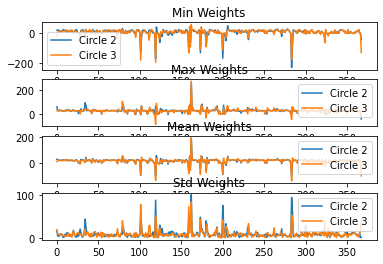

In [13]:
plot_weights((2, 3), "A")

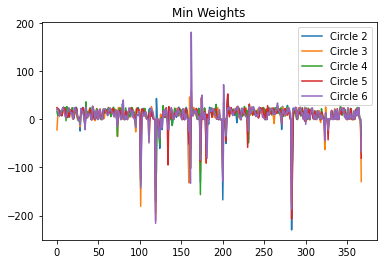

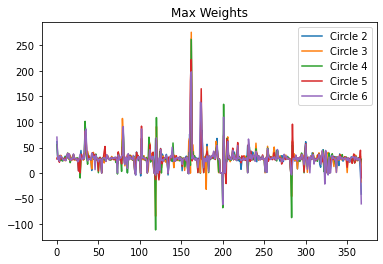

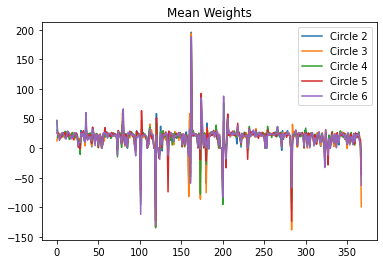

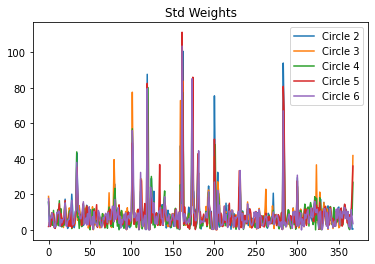

In [85]:
plot_weights((2, 3, 4, 5, 6), "A", True)

In [71]:
def plot_weights(circles, type, save=False, check_outliers=False):
    # Верхняя и нижняя границы для выбросов
    lower_bound = 20
    upper_bound = 30

    # Списки для хранения значений для каждого графика
    min_values = {circle: [] for circle in circles}
    max_values = {circle: [] for circle in circles}
    mean_values = {circle: [] for circle in circles}
    std_values = {circle: [] for circle in circles}

    for holder in range(368):
        for circle in circles:
            weights = get_weights(circle, type, holder)
            
            # Проверка на выбросы
            if check_outliers:
                mean_weight = np.mean(weights)
                if mean_weight < lower_bound or mean_weight > upper_bound:
                    continue
            
            # Статистика
            min_values[circle].append(np.min(weights))
            max_values[circle].append(np.max(weights))
            mean_values[circle].append(np.mean(weights))
            std_values[circle].append(np.std(weights))

    for values, title in zip([min_values, max_values, mean_values, std_values], ['Min Weights', 'Max Weights', 'Mean Weights', 'Std Weights']):
        plt.figure(figsize=(12, 6))
        for circle in circles:
            plt.plot(range(len(values[circle])), values[circle], 'o', label=f'Circle {circle}')
        plt.legend()
        plt.title(title)
        plt.grid(True)
        if save:
            plt.savefig(f'{title.replace(" ", "_").lower()}.png', dpi=600)
        plt.show()

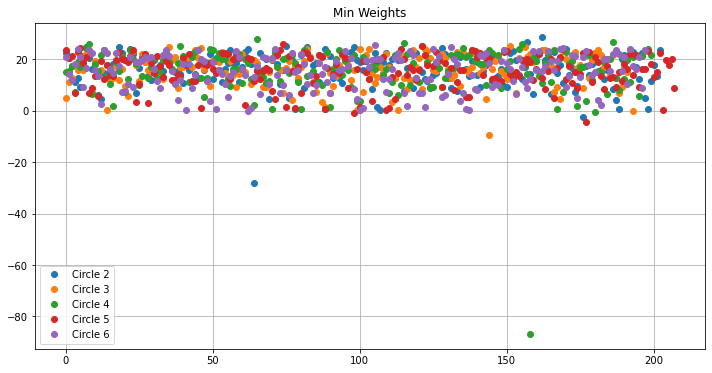

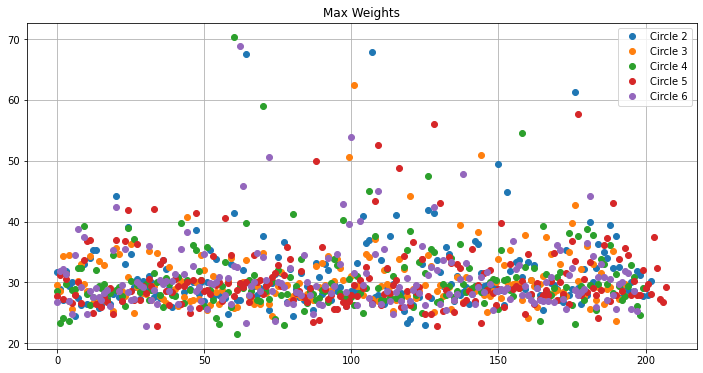

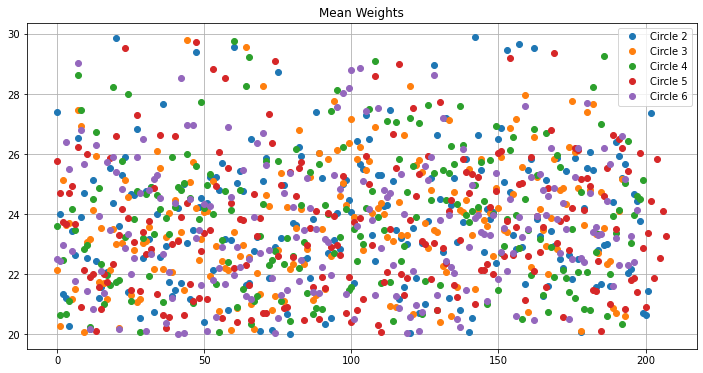

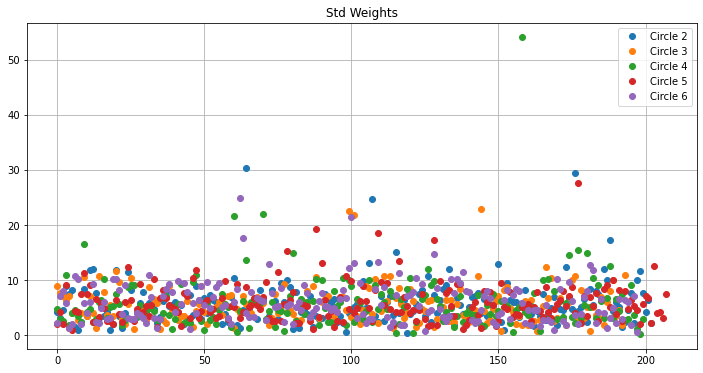

In [72]:
plot_weights((2, 3, 4, 5, 6), "A", True, True)

In [73]:
def plot_filtered_weights(circles, type, save=False, check_outliers=False):
    # Верхняя и нижняя границы для выбросов
    lower_bound = 20
    upper_bound = 30

    # Списки для хранения значений для каждого графика
    min_values = {circle: [] for circle in circles}
    max_values = {circle: [] for circle in circles}
    mean_values = {circle: [] for circle in circles}
    std_values = {circle: [] for circle in circles}

    for holder in range(368):
        for circle in circles:
            weights = get_weights_filtered(circle, type, holder)
            
            # Проверка на выбросы
            if check_outliers:
                mean_weight = np.mean(weights)
                if mean_weight < lower_bound or mean_weight > upper_bound:
                    continue
            
            # Статистика
            min_values[circle].append(np.min(weights))
            max_values[circle].append(np.max(weights))
            mean_values[circle].append(np.mean(weights))
            std_values[circle].append(np.std(weights))

    for values, title in zip([min_values, max_values, mean_values, std_values], ['Min Weights', 'Max Weights', 'Mean Weights', 'Std Weights']):
        plt.figure(figsize=(12, 6))
        for circle in circles:
            plt.plot(range(len(values[circle])), values[circle], 'o', label=f'Circle {circle}')
        plt.legend()
        plt.title(title)
        plt.grid(True)
        if save:
            plt.savefig(f'{title.replace(" ", "_").lower()}.png', dpi=600)
        plt.show()

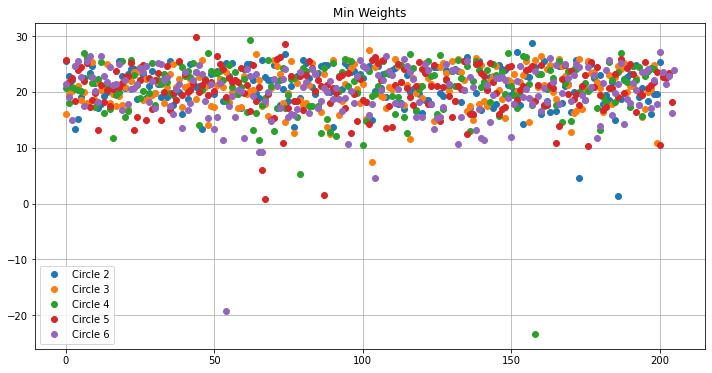

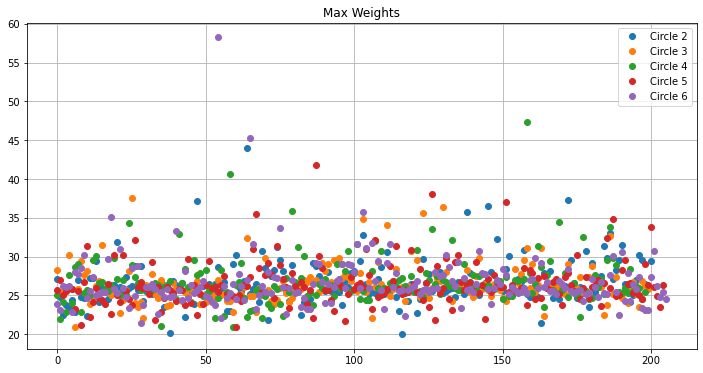

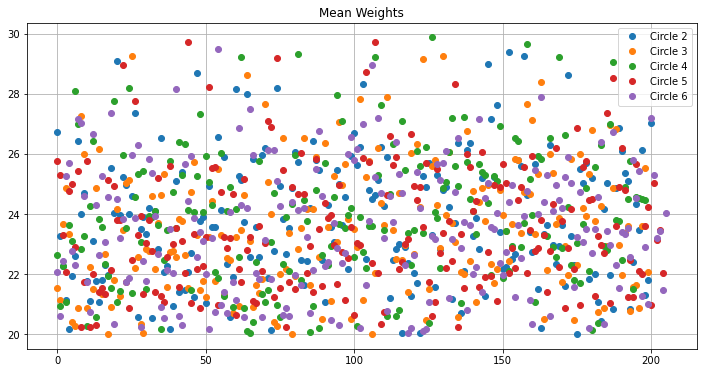

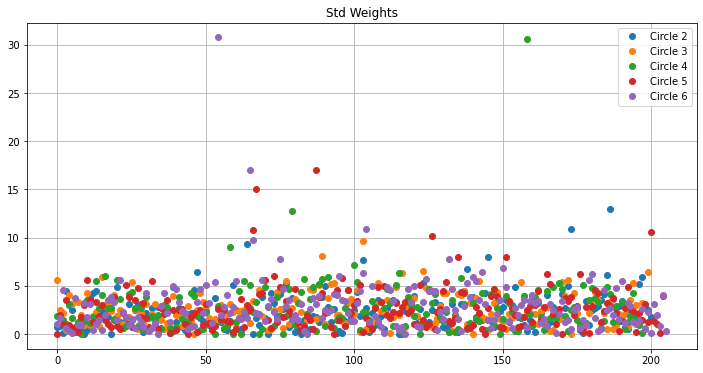

In [74]:
plot_filtered_weights((2, 3, 4, 5, 6), "A", True, True)